In [1]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import numpy as np
import pycountry
import plotly.express as px

# **Deforestation Data**

In [4]:
deforest_data = pd.read_excel("./Data/Deforest.xlsx")
deforest_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194,NaN,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037,NaN,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722,NaN,NaN


In [5]:
# Count the number of zero values in each column
zero_counts = (deforest_data == 0).sum()
#If there are values in a column that are equal to zero, it is equal to 4
zero_counts.unique()

array([0, 4])

In [6]:
deforest_data = deforest_data.drop(deforest_data[deforest_data["2019"] == 0]["Country Name"].index).reset_index(drop = True)
deforest_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194,NaN,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037,NaN,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Kosovo,XKX,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,"Yemen, Rep.",YEM,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,NaN,NaN
259,South Africa,ZAF,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.235127,14.205121,14.175115,14.145109,14.115103,14.085097,14.055091,14.025085,NaN,NaN
260,Zambia,ZMB,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.802392,61.549254,61.295955,61.042885,60.789707,60.536515,60.283337,60.030150,NaN,NaN


In [7]:
print("Number of countries in the deforestation dataset: ",len(deforest_data["Country Name"].unique()))

Number of countries in the deforestation dataset:  262


In [8]:
str_col_number = (deforest_data.dtypes == 'O').value_counts().iloc[1]
float_col_number = (deforest_data.dtypes == 'O').value_counts().iloc[0]
print(f"Number of string columns: {str_col_number}")
print(f"Number of float columns: {float_col_number}")

Number of string columns: 4
Number of float columns: 64


In [9]:
data_topic = deforest_data["Indicator Name"].unique()[0] #Unnecessary column
deforest_data = deforest_data.drop(["Indicator Name","Indicator Code"], axis = 1) #Dropping the column
print(f"Dataset topic: {data_topic}")

Dataset topic: Forest area (% of land area)


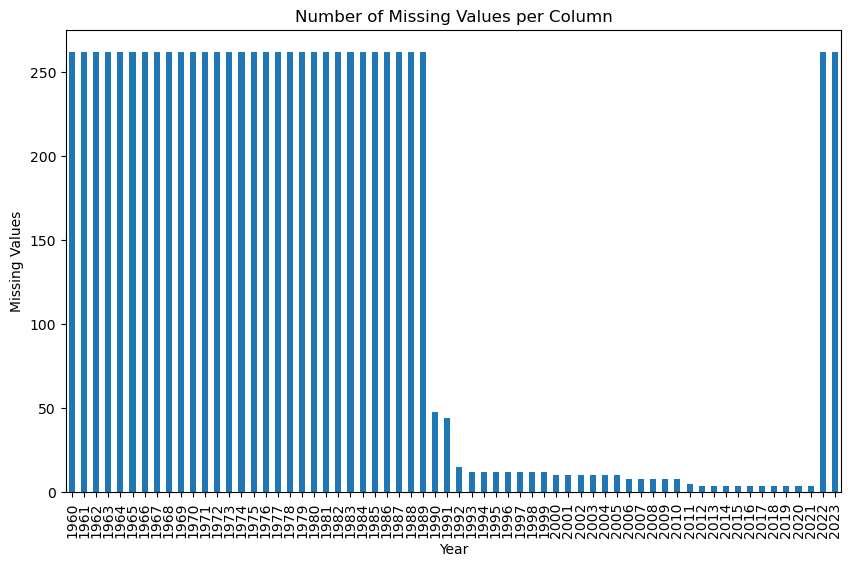

In [10]:
#Columns
# We will use regex to find all columns that represent years (assuming years are 4-digit numbers starting with '19' or '20').
year_columns = [col for col in deforest_data.columns if re.match(r'^\d{4}$', col)]

#Potting the missing values
plt.figure(figsize=(10, 6))  # You can adjust the (width, height) as needed
missing_values = deforest_data[year_columns].isnull().sum()
missing_values.plot(kind='bar', title='Number of Missing Values per Column', xlabel='Year', ylabel='Missing Values')

# Show the plot
plt.show()


In [11]:
all_missing_columns = deforest_data[year_columns].isnull().all()
# Filter out the columns that are entirely missing
columns_with_all_missing = all_missing_columns[all_missing_columns].index.tolist()
# Result: We don't have data for the years: 1960-1989 & 2022,2023

# Drop the columns that have all  
deforest_data = deforest_data.drop(columns_with_all_missing ,axis = 1)

#Converting the years to integers
deforest_data.rename(columns={col: int(col) for col in year_columns}, inplace=True)

#We want the data starting from 2000
columns_from_2000 = [col for col in deforest_data.columns if isinstance(col, int) and col >= 2000]

# Filter the DataFrame to include only the columns from the year 2000 onwards
data_with_desired_years = deforest_data[columns_from_2000]

#Joining the dataframes
final_deforest_data = deforest_data[["Country Name","Country Code"]].join(data_with_desired_years)
final_deforest_data.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333
1,Africa Eastern and Southern,AFE,34.717473,34.537463,34.357452,34.177441,33.654274,33.475977,33.297802,33.119504,...,31.890654,31.680635,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253,29.955194
2,Afghanistan,AFG,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
3,Africa Western and Central,AFW,21.595284,21.503156,21.411029,21.318902,21.226775,21.134648,21.042520,20.950393,...,20.498099,20.410143,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777,19.732037
4,Angola,AGO,62.331443,61.886219,61.440995,60.995770,60.550546,60.105322,59.660098,59.214874,...,56.988751,56.543526,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722


In [12]:
#Preliminary cleaning
final_deforest_data["Country Name"] = final_deforest_data["Country Name"] + " " + final_deforest_data["Country Code"]
final_deforest_data.reset_index(drop = True, inplace = True)

#Dropping some of the columns for clearer structure
df_cleaned = final_deforest_data.drop(columns='Country Code')

# Reshape the data using the melt function to create a long format
df_long = df_cleaned.melt(id_vars=['Country Name'], var_name='Year', value_name='Values')

# Convert 'Year' column to numeric if necessary (remove '.0' from the years)
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

#Adding the country code
df_long["Country Code"] = df_long["Country Name"].apply(lambda val:val.split(" ")[-1])
df_long["Country Name"] = df_long["Country Name"].apply(lambda val: " ".join(val.split(" ")[:-1]))

#Ordering the columns
df_long = df_long[["Country Name","Country Code","Year","Values"]]

df_long.head()

,Country Name,Country Code,Year,Values
0,Aruba,ABW,2000,2.333333
1,Africa Eastern and Southern,AFE,2000,34.717473
2,Afghanistan,AFG,2000,1.852782
3,Africa Western and Central,AFW,2000,21.595284
4,Angola,AGO,2000,62.331443


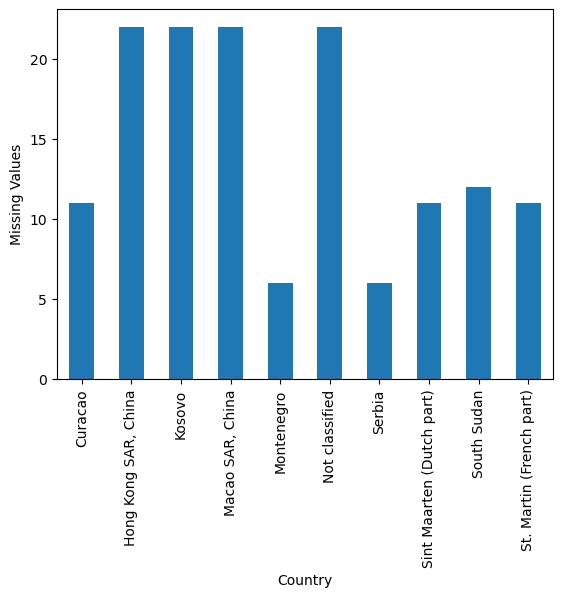

In [13]:
#Number of data points per each country
len_country = len(df_long[df_long["Country Name"] == "Switzerland"])

# Count the number of NaN values for each country
nan_count_per_country = df_long.groupby('Country Name').apply(lambda x: x.isna().sum())["Values"]

# Plot a bar plot of the 'nan_count_per_country' DataFrame
nan_count_per_country[nan_count_per_country > 0].plot(kind = 'bar', xlabel='Country', ylabel='Missing Values')

#These countries can be dropped
countries_dropped = nan_count_per_country[nan_count_per_country > 0].index


In [14]:
country_lst = nan_count_per_country[nan_count_per_country > 0].index.to_list()

#Dropping all the data related to countries above
df_cleaned = df_long[~df_long['Country Name'].isin(country_lst)]
df_cleaned.head()

,Country Name,Country Code,Year,Values
0,Aruba,ABW,2000,2.333333
1,Africa Eastern and Southern,AFE,2000,34.717473
2,Afghanistan,AFG,2000,1.852782
3,Africa Western and Central,AFW,2000,21.595284
4,Angola,AGO,2000,62.331443


In [15]:
#Data availability per country
data_avl = df_cleaned.groupby("Country Name").count()["Values"].unique()[0] #Data point per country
print(f"Data point per country: {data_avl}")

Data point per country: 22


In [16]:
#Just taking the absolute regular difference val[i]-val[i-1] as the data is provided in percentage
deforestation_rate= df_cleaned.groupby("Country Name")["Values"].apply(lambda x: x.diff().fillna(0))
rate_df = pd.DataFrame(deforestation_rate).reset_index().drop("level_1", axis = 1)
rate_df

,Country Name,Values
0,Afghanistan,0.00000
1,Afghanistan,0.00000
2,Afghanistan,0.00000
3,Afghanistan,0.00000
4,Afghanistan,0.00000
...,...,...
5539,Zimbabwe,-0.11909
5540,Zimbabwe,-0.11909
5541,Zimbabwe,-0.11909
5542,Zimbabwe,-0.11909


In [17]:
nan_count_by_country = rate_df.groupby("Country Name")["Values"].apply(lambda x: x.isna().sum())
nan_count_by_country

Country Name
Afghanistan                    0
Africa Eastern and Southern    0
Africa Western and Central     0
Albania                        0
Algeria                        0
                              ..
West Bank and Gaza             0
World                          0
Yemen, Rep.                    0
Zambia                         0
Zimbabwe                       0
Name: Values, Length: 252, dtype: int64

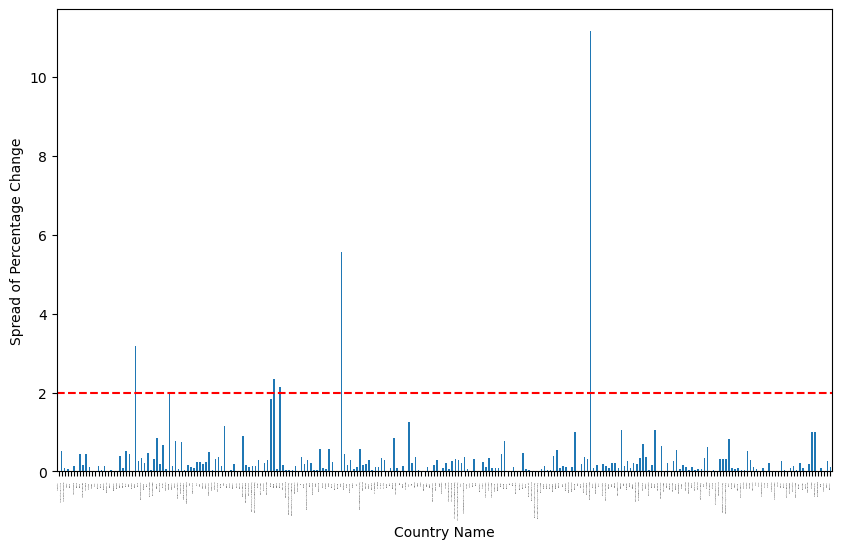

In [18]:
#Outlier analysis
#Calcualte the spread of deforestation rate for countries (max  - min)
spread_df = rate_df.groupby("Country Name")["Values"].agg(lambda x: x.max() - x.min())
#Therefore it is reasonable to take the average per country


plt.figure(figsize=(10, 6))
spread_df.plot(kind = "bar")
plt.xticks(fontsize=0.4)  # Set the font size as desired (e.g., 6)
plt.ylabel('Spread of Percentage Change')
plt.axhline(y=2, color='red', linestyle='--')
plt.show()


In [19]:
#spread_df[spread_df>2] #The difference between maximum percentage change and minimum percentage is larger than %2
#countries_with_large_spread = (spread_df[spread_df>2]).index.to_list()
#df_filtered = rate_df[~rate_df['Country Name'].isin(countries_with_large_spread)]#Removing those countries
#print(spread_df[spread_df>2])

In [20]:
print(rate_df['Values'].skew())

-12.746854085189748


In [21]:
#df_cleaned[df_cleaned["Country Name"] == "Northern Mariana Islands"] #Just tot look at the forest rate coverage 

In [22]:
# Function to get ISO-3 country code from country name
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

In [23]:
average_deforestation = rate_df.groupby("Country Name")["Values"].mean().reset_index()  #Taking the average
#Now this becomes the average percentage change at the last 20 years (For example: For Albania the average deforestation rate is 0.035%)
average_deforestation

,Country Name,Values
0,Afghanistan,0.000000
1,Africa Eastern and Southern,-0.216467
2,Africa Western and Central,-0.084693
3,Albania,0.032515
4,Algeria,0.007239
...,...,...
247,West Bank and Gaza,0.007940
248,World,-0.037627
249,"Yemen, Rep.",0.000000
250,Zambia,-0.148471


In [24]:
# Add ISO-3 codes to the DataFrame
average_deforestation['iso3'] = average_deforestation['Country Name'].apply(get_iso3)

In [25]:
average_deforestation[average_deforestation['iso3'].isnull()]

,Country Name,Values,iso3
1,Africa Eastern and Southern,-0.216467,None
2,Africa Western and Central,-0.084693,None
9,Arab World,-0.034543,None
16,"Bahamas, The",0.000000,None
39,Caribbean small states,-0.049296,None
...,...,...,...
244,"Venezuela, RB",-0.153446,None
246,Virgin Islands (U.S.),-0.053247,None
247,West Bank and Gaza,0.007940,None
248,World,-0.037627,None


In [26]:
# Reverting to previous data before dropping and then manually resolving country mismatches
country_mapping = {
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'United States',
    'Venezuela, RB': 'Venezuela',
    'Bahamas, The': 'Bahamas',
    'Congo, Dem. Rep.':'Congo, The Democratic Republic of the',
    'Congo, Rep.': 'Congo',
    'Turkiye': 'Türkiye',
    "Cote d'Ivoire":"Côte d'Ivoire",
    'St. Lucia':'Saint Lucia',
    "Korea, Dem. People's Rep." : "Korea, Democratic People's Republic of",
    'Korea, Rep.': 'Korea, Republic of',
    'Lao PDR':"Lao People's Democratic Republic",
    'Gambia, The': 'Gambia',
    'Egypt, Arab Rep.': 'Egypt',
    'Iran, Islamic Rep.': 'Iran, Islamic Republic of',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
    'Micronesia, Fed. Sts.': 'Micronesia, Federated States of',
    'Virgin Islands (U.S.)':'Virgin Islands, U.S.',
    'Yemen, Rep.':'Yemen',
    # You can add more mappings if necessary
}
average_deforestation['Country Name'] = average_deforestation['Country Name'].replace(country_mapping)

In [27]:
# Lookup the country by ISO3 code
country = pycountry.countries.get(alpha_3='VIR')

# Display the country name
country.name

'Virgin Islands, U.S.'

In [28]:
country_not_country = [
    'Africa Eastern and Southern', 
    'Africa Western and Central',
    'Central Europe and the Baltics',
    'Upper middle income',
    'East Asia & Pacific (IDA & IBRD countries)',
    'East Asia & Pacific',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (IDA & IBRD countries)',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)',
    'Early-demographic dividend',
    'High income',
    'IBRD only',
    'IDA & IBRD total',
    'IDA blend',
    'IDA only',
    'IDA total',
    'Late-demographic dividend',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Least developed countries: UN classification',
    'Low & middle income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (IDA & IBRD countries)',
    'Middle income',
    'Low income',
    'North America',
    'OECD members',
    'Other small states',
    'Pacific island small states',
    'Post-demographic dividend',
    'Small states',
    'South Asia',
    'Sub-Saharan Africa (IDA & IBRD countries)',
    'Sub-Saharan Africa (excluding high income)',
    'Pre-demographic dividend',
    'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa',
    'West Bank and Gaza',
    'Caribbean small states',
    'Channel Islands',
    'Arab World',
    'Middle East & North Africa (excluding high income)',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'World'
]

average_deforestation = average_deforestation[~average_deforestation['Country Name'].isin(country_not_country)]

In [29]:
average_deforestation['iso3'] = average_deforestation['Country Name'].apply(get_iso3)

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_49123/330967049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_deforestation['iso3'] = average_deforestation['Country Name'].apply(get_iso3)


In [30]:
average_deforestation[average_deforestation['iso3'].isnull()]

,Country Name,Values,iso3


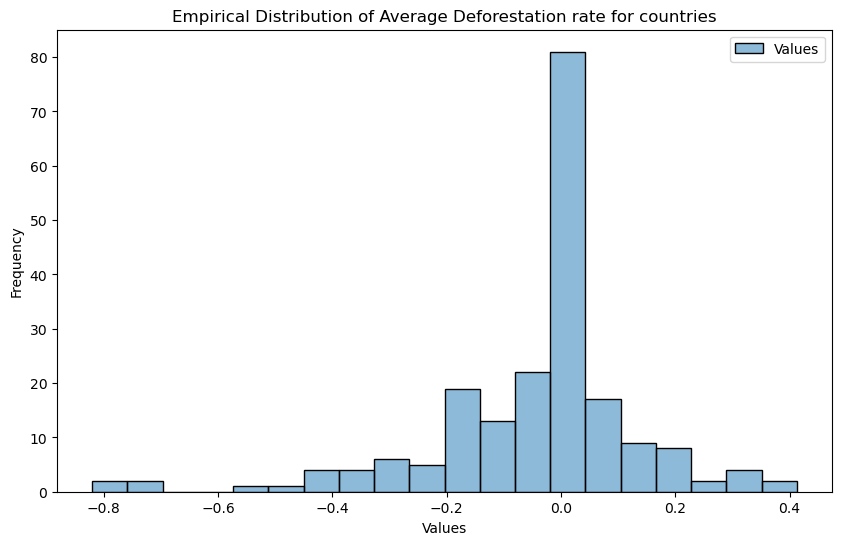

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(average_deforestation, bins=20, kde=False, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Average Deforestation rate for countries')

# Show the plot
plt.show()

In [32]:
print(average_deforestation['Values'].skew())

-1.341670682283304


### **Research Question**: What is the effect of agricultural land expansion rate of corn fields on deforestation rate of countries by controlling for land size of countries?     

In [33]:
corn_field_data = pd.read_csv('./Data/FAOSTAT_data_en_10-2-2024.csv')
corn_field_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1961,1961,ha,500000,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1962,1962,ha,500000,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1963,1963,ha,500000,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1964,1964,ha,505000,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1965,1965,ha,500000,A,Official figure,NaN


In [34]:
#Filtering the data between 2000 and 2021
corn_field_data = corn_field_data[(corn_field_data['Year'] >= 2000) & (corn_field_data['Year'] <= 2021)]

In [35]:
#Shape of the data
corn_field_data.shape

(3669, 15)

In [36]:
corn_field_data["Note"].unique()

array([nan, 'Unofficial figure'], dtype=object)

In [37]:
corn_field_data["Flag Description"].unique()

array(['Official figure', 'Estimated value', 'Imputed value',
       'Figure from international organizations',
       'Missing value (data cannot exist, not applicable)'], dtype=object)

In [38]:
corn_field_data = corn_field_data[(corn_field_data["Flag Description"] == "Official figure") & (corn_field_data["Note"] != "Unofficial figure")]

In [39]:
#Unique country amount: Does the number of countires in this data match with deforestation data?
print("Number of countries in the corn field dataset: ",len(corn_field_data["Area"].unique()))

Number of countries in the corn field dataset:  162


In [40]:
#The two columns are the same
print(len(corn_field_data["Year Code"] == corn_field_data["Year"]) == len(corn_field_data))
print(corn_field_data["Domain"].unique()[0])
print(corn_field_data["Element"].unique()[0])
print(corn_field_data["Item"].unique()[0])

corn_field_data = corn_field_data[["Area","Value"]] #extracting the necessary columns
corn_field_data.head(30)

True
Crops and livestock products
Area harvested
Maize (corn)


,Area,Value
39,Afghanistan,96000
40,Afghanistan,80000
41,Afghanistan,100000
42,Afghanistan,250000
43,Afghanistan,250000
44,Afghanistan,261000
45,Afghanistan,137000
46,Afghanistan,137000
47,Afghanistan,137000
48,Afghanistan,140000


In [41]:
areas_to_exclude = corn_field_data[corn_field_data["Value"] == 0]["Area"].unique() #These countries include 0 values
#Exclude these countries completely
corn_field_data = corn_field_data[~corn_field_data['Area'].isin(areas_to_exclude)]
corn_field_data.head()

,Area,Value
39,Afghanistan,96000
40,Afghanistan,80000
41,Afghanistan,100000
42,Afghanistan,250000
43,Afghanistan,250000


In [42]:
corn_field_data.dtypes #No need to convert the year column

Area     object
Value     int64
dtype: object

In [43]:
#Missing values
corn_field_data.isna().sum()

Area     0
Value    0
dtype: int64

In [44]:
#Calculating the corn field expansion rate
corn_field_exp_rt= corn_field_data.groupby("Area")["Value"].apply(lambda x: x.pct_change()*100)
corn_field_exp_rt_df = pd.DataFrame(corn_field_exp_rt).reset_index().drop("level_1", axis = 1)
#Dropping na values due to percentange change calculation
corn_field_exp_rt_df = corn_field_exp_rt_df.dropna()

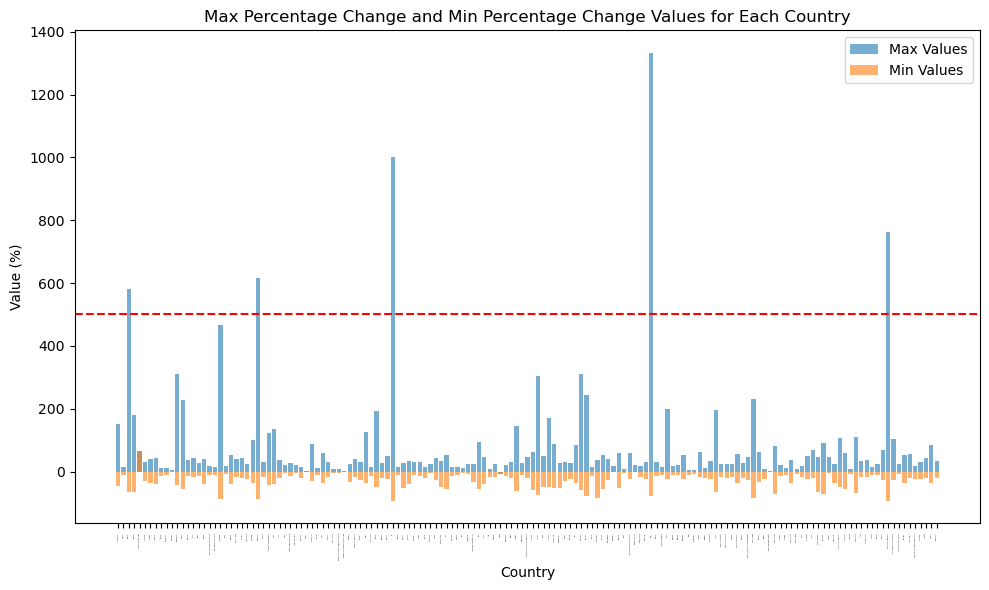

In [45]:
#Calcualtin gthe max-min percentage changes in corn field expansion rate
max_min_values = corn_field_exp_rt_df.groupby("Area")["Value"].agg([max, min])


# Plotting the max and min values for each country
plt.figure(figsize=(10, 6))

# Plot the max values
plt.bar(max_min_values.index, max_min_values['max'], label='Max Values', alpha=0.6)

# Plot the min values
plt.bar(max_min_values.index, max_min_values['min'], label='Min Values', alpha=0.6)

plt.xticks(fontsize=0.4)
# Add labels and title
plt.xlabel('Country')
plt.ylabel('Value (%)')
plt.title('Max Percentage Change and Min Percentage Change Values for Each Country')
plt.xticks(rotation=90)
plt.axhline(y=500, color='red', linestyle='--')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
#Excluding the outliers (Excluding %500 times expansion)
#outlier_countries = max_min_values[(max_min_values["max"] > 500)].index
#outlier_countries

In [47]:
#Calculating the average corn field expansion rate
avg_cornf_field_exp = corn_field_exp_rt_df.groupby("Area")["Value"].mean().reset_index()
#Excluding outliers
#cleaned_cornf_field_exp = avg_cornf_field_exp[~avg_cornf_field_exp.index.isin(outlier_countries)]
cleaned_cornf_field_exp = avg_cornf_field_exp
cleaned_cornf_field_exp

,Area,Value
0,Afghanistan,7.371932
1,Albania,0.633505
2,Algeria,45.699402
3,Angola,13.779700
4,Antigua and Barbuda,66.666667
...,...,...
148,Venezuela (Bolivarian Republic of),-0.365623
149,Viet Nam,1.495423
150,Yemen,1.898018
151,Zambia,8.643074


<Axes: ylabel='Count'>

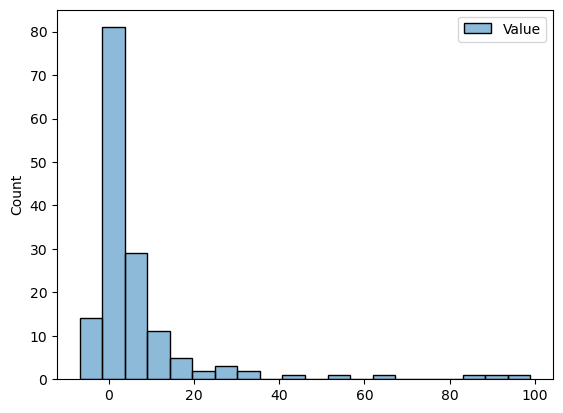

In [48]:
sns.histplot(cleaned_cornf_field_exp, bins=20, kde=False, edgecolor='black')

In [49]:
print(cleaned_cornf_field_exp['Value'].skew())

3.9429604364357362


# Land Size

In [50]:
# Get data for 'Land area (sq. km)' for all countries
indicators = {'AG.LND.TOTL.K2': 'Land area (sq. km)'}
data = wbdata.get_dataframe(indicators)

# Display the land area for all countries
org_data = data.reset_index()

#Converting the year column to integer
org_data['date'] = org_data['date'].astype(int)

org_data.head()


,country,date,Land area (sq. km)
0,Africa Eastern and Southern,2023,NaN
1,Africa Eastern and Southern,2022,NaN
2,Africa Eastern and Southern,2021,1.484509e+07
3,Africa Eastern and Southern,2020,1.484509e+07
4,Africa Eastern and Southern,2019,1.484513e+07


In [51]:
filtered_data = org_data[(org_data['date'] >= 2000) & (org_data['date'] <= 2021)]
avg_land_size_df = filtered_data.groupby('country').agg(  # Count of unique values per country
    Average_Land_Size=('Land area (sq. km)', 'mean')     # Average of the values per country
)
avg_land_size_df

,Average_Land_Size
country,
Afghanistan,6.522300e+05
Africa Eastern and Southern,1.475005e+07
Africa Western and Central,9.045779e+06
Albania,2.740000e+04
Algeria,2.381740e+06
...,...
West Bank and Gaza,6.020227e+03
World,1.298152e+08
"Yemen, Rep.",5.279700e+05


# Result

In [52]:
avg_land_size_df= avg_land_size_df.reset_index()
avg_land_size_df.head()

,country,Average_Land_Size
0,Afghanistan,6.522300e+05
1,Africa Eastern and Southern,1.475005e+07
2,Africa Western and Central,9.045779e+06
3,Albania,2.740000e+04
4,Algeria,2.381740e+06


In [53]:
cleaned_corn_df = pd.DataFrame(cleaned_cornf_field_exp).reset_index()
cleaned_corn_df.head()

,index,Area,Value
0,0,Afghanistan,7.371932
1,1,Albania,0.633505
2,2,Algeria,45.699402
3,3,Angola,13.779700
4,4,Antigua and Barbuda,66.666667


In [54]:
cleaned_def = pd.DataFrame(average_deforestation).reset_index()
cleaned_def.head()

,index,Country Name,Values,iso3
0,0,Afghanistan,0.000000,AFG
1,3,Albania,0.032515,ALB
2,4,Algeria,0.007239,DZA
3,5,American Samoa,-0.143182,ASM
4,6,Andorra,0.000000,AND


In [55]:
# Reverting to previous data before dropping and then manually resolving country mismatches
country_mapping = {
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'United States',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Türkiye': 'Turkey',
    'Africa Eastern and Southern': 'Eastern and Southern Africa',
    'Africa Western and Central': 'Western and Central Africa',
    # You can add more mappings if necessary
}

# Rename columns again to 'Country'
avg_land_size_df.rename(columns={'country': 'Country'}, inplace=True)
cleaned_corn_df.rename(columns={'Area': 'Country'}, inplace=True)
cleaned_def.rename(columns={'Country Name': 'Country'}, inplace=True)

avg_land_size_df['Country'] = avg_land_size_df['Country'].replace(country_mapping)
cleaned_corn_df['Country'] = cleaned_corn_df['Country'].replace(country_mapping)
cleaned_def['Country'] = cleaned_def['Country'].replace(country_mapping)


# Merging dataframes without dropping any countries, and will handle missing data
final_merged_df = pd.merge(avg_land_size_df, cleaned_corn_df, on='Country', how='outer')
final_merged_df = pd.merge(final_merged_df, cleaned_def, on='Country', how='outer')

final_merged_df


,Country,Average_Land_Size,index_x,Value,index_y,Values,iso3
0,Afghanistan,6.522300e+05,0.0,7.371932,0.0,0.000000,AFG
1,Eastern and Southern Africa,1.475005e+07,NaN,NaN,NaN,NaN,NaN
2,Western and Central Africa,9.045779e+06,NaN,NaN,NaN,NaN,NaN
3,Albania,2.740000e+04,1.0,0.633505,3.0,0.032515,ALB
4,Algeria,2.381740e+06,2.0,45.699402,4.0,0.007239,DZA
...,...,...,...,...,...,...,...
292,"Korea, Republic of",NaN,NaN,NaN,123.0,-0.128323,KOR
293,"Micronesia, Federated States of",NaN,NaN,NaN,153.0,0.038312,FSM
294,Saint Kitts and Nevis,NaN,NaN,NaN,212.0,0.000000,KNA
295,Saint Lucia,NaN,NaN,NaN,213.0,-0.017884,LCA


In [56]:
'Algeria' in cleaned_corn_df['Country']

False

In [57]:
cleaned_corn_df['Country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
148              Venezuela
149               Viet Nam
150                  Yemen
151                 Zambia
152               Zimbabwe
Name: Country, Length: 153, dtype: object

In [58]:
# Define the function to detect duplicates, group by partition, fill values with zeros, and sum them up
def consolidate_duplicates(df, country_column):
    # Make a copy of the dataframe to avoid modifying the original one
    df_copy = df.copy()
    
    # Standardize country names for consistency (can extend this part to include more mappings if necessary)
    df_copy[country_column] = df_copy[country_column].replace({
        "Cote d'Ivoire": "Côte d'Ivoire",
        "Democratic Republic of the Congo": "Congo, Dem. Rep.",
        "Korea, Rep.": "South Korea",
        "Korea, Dem. People's Rep.": "North Korea",
        "Egypt, Arab Rep.": "Egypt",
        "Iran (Islamic Republic of)": "Iran, Islamic Rep.",
        "Netherlands (Kingdom of the)" : "Netherlands",
        "Slovak Republic" : "Slovakia",
        "Turkiye" : "Turkey",
        "Venezuela, RB" : "Veneuzela",
        "Yemen, Rep." : "Yemen",
        "Republic of Korea": "South Korea",
        "Republic of Moldova":"Moldova",
        "Kyrgyz Republic" : "Kyrgyzstan"
    })
    
    # Get the list of unique countries
    unique_countries = df_copy[country_column].unique()
    
    # Loop through unique countries
    result_list = []
    
    for country in unique_countries:
        # Filter the rows for the current country
        partition = df_copy[df_copy[country_column] == country]
        
        # If there are duplicates, group them by the country and sum the numeric values
        if len(partition) > 1:
            # Replace NaNs with zeros for aggregation
            partition = partition.fillna(0)
            
            # Sum the rows and keep the country name intact
            summed_partition = partition.groupby(country_column).sum().reset_index()
            
            # Append the result to the list
            result_list.append(summed_partition)
        else:
            # If there are no duplicates, keep the partition as it is
            result_list.append(partition)
    
    # Concatenate all results into a final dataframe
    final_df = pd.concat(result_list, ignore_index=True)
    
    return final_df

# Applying the function to the example data
final_grouped_df = consolidate_duplicates(final_merged_df, 'Country')




TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
final_grouped_df[final_grouped_df["Country"] == "Côte d'Ivoire"]

In [ ]:
final_grouped_df[final_grouped_df["Country"] == "Bolivia"]

In [ ]:
final_grouped_df[final_grouped_df["Country"] == "Iran, Islamic Rep."]

In [ ]:
#Now drop the rows with missing data
last_df = final_grouped_df.dropna()
last_df = last_df.reset_index(drop = True)

In [ ]:
last_df.head()

In [ ]:
last_df.isna().sum().sum()

In [ ]:
#Renaming the columns
last_df = last_df.rename({"Value":"Average_Corn_Field_Expansion_Rate",
                          "Values":"Average_Deforestation_Rate"},axis = 1)

last_df

In [ ]:
last_df['Country'] = last_df['Country'].replace('Turkey', 'Türkiye')

In [ ]:
last_df['Country'] = last_df['Country'].replace('Congo, Dem. Rep.', 'Congo, The Democratic Republic of the')

In [ ]:
last_df['Country'] = last_df['Country'].replace('Iran, Islamic Rep.', 'Iran')

In [ ]:
# Function to get ISO-3 country code from country name
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None
    
# Add ISO-3 codes to the DataFrame
last_df['iso3'] = last_df['Country'].apply(get_iso3)
last_df

In [ ]:
last_df[last_df['iso3'].isnull()]

In [ ]:
# Now plot the map with Plotly Express
fig = px.choropleth(last_df, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='Average_Deforestation_Rate',  # Average deforestation rates
                    hover_name='Country',
                    title = 'Average Deforestation Rate per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [ ]:
# Now plot the map with Plotly Express
fig = px.choropleth(last_df, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='Average_Corn_Field_Expansion_Rate',  # Average deforestation rates
                    hover_name='Country',
                    title = 'Average Corn Field Expansion Rate per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()